In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/ResearchProject/SampleModel/New Plant Diseases Dataset(Augmented)/train'
valid_path = '/content/drive/MyDrive/ResearchProject/SampleModel/New Plant Diseases Dataset(Augmented)/valid'

In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 1s 0us/step


In [5]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/ResearchProject/SampleModel/New Plant Diseases Dataset(Augmented)/train/*')

In [7]:
folders

['/content/drive/MyDrive/ResearchProject/SampleModel/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight',
 '/content/drive/MyDrive/ResearchProject/SampleModel/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot',
 '/content/drive/MyDrive/ResearchProject/SampleModel/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight',
 '/content/drive/MyDrive/ResearchProject/SampleModel/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy']

In [8]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/ResearchProject/SampleModel/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 634 images belonging to 4 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/ResearchProject/SampleModel/New Plant Diseases Dataset(Augmented)/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 555 images belonging to 4 classes.


In [15]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-15-04ffb29a66a7>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
20/20 [==============================] - 343s 17s/step - loss: 5.3311 - accuracy: 0.5079 - val_loss: 4.8073 - val_accuracy: 0.5171
Epoch 2/10
20/20 [==============================] - 156s 8s/step - loss: 1.0443 - accuracy: 0.8391 - val_loss: 2.6601 - val_accuracy: 0.6955
Epoch 3/10
20/20 [==============================] - 147s 7s/step - loss: 0.4450 - accuracy: 0.8959 - val_loss: 1.8737 - val_accuracy: 0.7243
Epoch 4/10
20/20 [==============================] - 164s 8s/step - loss: 0.3226 - accuracy: 0.9211 - val_loss: 2.0795 - val_accuracy: 0.7171
Epoch 5/10
20/20 [==============================] - 144s 7s/step - loss: 0.2106 - accuracy: 0.9479 - val_loss: 2.4456 - val_accuracy: 0.7189
Epoch 6/10
20/20 [==============================] - 146s 7s/step - loss: 0.1925 - accuracy: 0.9464 - val_loss: 2.2708 - val_accuracy: 0.6991
Epoch 7/10
20/20 [==============================] - 143s 7s/step - loss: 0.1605 - accuracy: 0.9574 - val_loss: 1.8730 - val_accuracy: 0.7207
Epoch 8/10
2

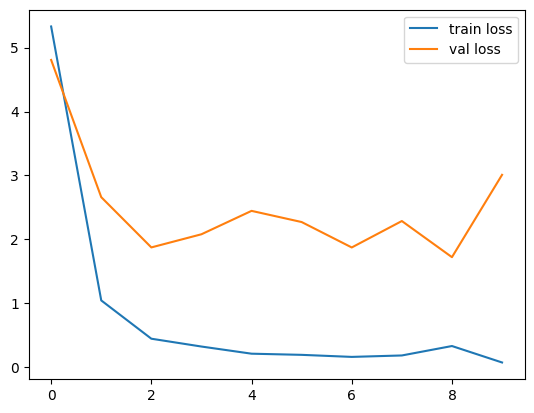

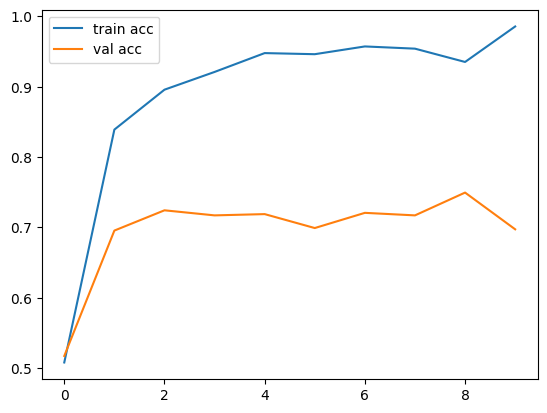

<Figure size 640x480 with 0 Axes>

In [16]:
# plot the loss

import matplotlib.pyplot as plt



plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [36]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [18]:

y_pred = model.predict(test_set)


18/18 [==============================] - 71s 4s/step


In [19]:
y_pred

array([[2.5731173e-12, 6.6209170e-05, 9.9993378e-01, 4.7322344e-20],
       [9.9999994e-01, 2.4889475e-14, 6.2477769e-15, 7.3688129e-16],
       [7.8933919e-04, 9.9349749e-01, 5.7131848e-03, 1.3484277e-09],
       ...,
       [1.6518413e-14, 1.0000000e+00, 1.5163919e-12, 3.4150496e-10],
       [1.0453252e-05, 3.4524724e-06, 9.5639855e-01, 4.3587487e-02],
       [4.2961759e-08, 1.0000000e+00, 2.1078936e-08, 5.8019465e-16]],
      dtype=float32)

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([2, 0, 1, 3, 0, 3, 1, 0, 2, 1, 1, 0, 0, 0, 0, 2, 3, 1, 1, 1, 1, 2,
       0, 1, 0, 0, 3, 0, 1, 1, 2, 1, 3, 0, 1, 2, 2, 3, 1, 3, 1, 0, 1, 1,
       1, 2, 3, 2, 1, 1, 1, 3, 2, 0, 2, 2, 0, 2, 0, 3, 1, 3, 2, 3, 0, 3,
       1, 3, 1, 1, 1, 3, 1, 0, 3, 0, 0, 3, 0, 1, 3, 2, 1, 3, 0, 0, 2, 2,
       1, 1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1, 2, 0, 2, 1, 2, 0, 1, 2, 1, 1,
       2, 2, 3, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 3, 2, 1, 2, 1, 2, 1,
       0, 1, 2, 3, 2, 2, 2, 0, 2, 2, 1, 0, 1, 0, 0, 2, 2, 1, 3, 0, 2, 0,
       1, 1, 3, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 2, 3, 1, 1, 0, 1, 1, 0, 3,
       1, 2, 2, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 2, 1, 0, 0, 0, 0, 3, 0,
       0, 0, 3, 1, 0, 3, 1, 3, 1, 0, 2, 2, 3, 3, 1, 1, 1, 0, 0, 0, 3, 1,
       3, 2, 3, 1, 0, 0, 0, 0, 3, 1, 0, 0, 1, 3, 2, 1, 0, 0, 2, 1, 1, 1,
       0, 1, 0, 2, 0, 1, 1, 2, 2, 2, 2, 1, 2, 0, 0, 3, 2, 0, 3, 1, 3, 2,
       2, 2, 1, 3, 0, 1, 1, 3, 3, 0, 3, 3, 0, 2, 1, 0, 0, 0, 0, 0, 1, 2,
       3, 2, 2, 0, 3, 2, 2, 2, 0, 1, 1, 2, 0, 1, 0,

In [65]:
model = tf.keras.models.load_model('model_inception.h5')

In [66]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set paths for training data (adjust path as needed)
train_dir = '/content/drive/MyDrive/ResearchProject/SampleModel/New Plant Diseases Dataset(Augmented)/train'

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'
)


# Get the class indices
class_indices = train_generator.class_indices

# Print the class indices to verify
print(class_indices)


Found 634 images belonging to 4 classes.
{'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___healthy': 3}


In [67]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from google.colab import files
import matplotlib.pyplot as plt

def predict_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)

    # Load the class names
    class_names = list(train_generator.class_indices.keys())
    result = class_names[predicted_class[0]]

    return result

def upload_and_predict():
    uploaded = files.upload()
    for filename in uploaded.keys():
        # Display image
        img_path = filename
        img = load_img(img_path)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

        # Predict
        result = predict_image(img_path)
        print(f'Predicted class: {result}')


In [1]:
upload_and_predict()
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'
)

NameError: name 'upload_and_predict' is not defined